In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('rolling_stones_spotify.csv')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


# EDA

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df.shape

(1610, 17)

In [5]:
# create copy
dfc = df.copy()
dfc.shape

(1610, 17)

In [6]:
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


In [8]:
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [9]:
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [10]:
df.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [11]:
df.dtypes

name                 object
album                object
release_date         object
track_number          int64
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
dtype: object

<AxesSubplot: >

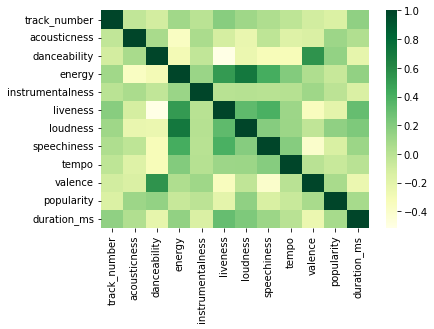

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=None, cmap='YlGn')

In [13]:
corr = df.corr(numeric_only=True)
corr.to_csv('spotify_corr.csv')

In [14]:
df.drop(['track_number'], axis=1, inplace=True)
df.drop(['acousticness'], axis=1, inplace=True)
df.drop(['instrumentalness'], axis=1, inplace=True)
df.drop(['tempo'], axis=1, inplace=True)
df.drop(['popularity'], axis=1, inplace=True)
df.drop(['duration_ms'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1610 non-null   object 
 1   album         1610 non-null   object 
 2   release_date  1610 non-null   object 
 3   id            1610 non-null   object 
 4   uri           1610 non-null   object 
 5   danceability  1610 non-null   float64
 6   energy        1610 non-null   float64
 7   liveness      1610 non-null   float64
 8   loudness      1610 non-null   float64
 9   speechiness   1610 non-null   float64
 10  valence       1610 non-null   float64
dtypes: float64(6), object(5)
memory usage: 138.5+ KB


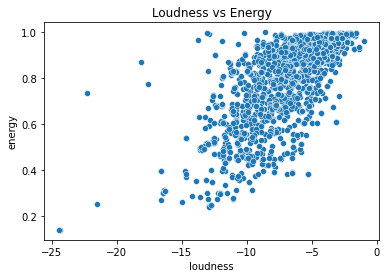

In [16]:
sns.scatterplot(x = df['loudness'], y = df['energy'])
plt.title('Loudness vs Energy')
plt.show()

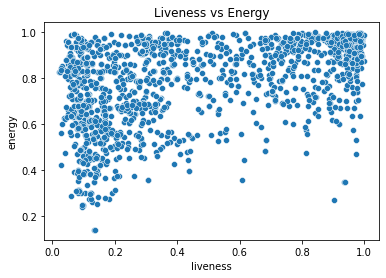

In [17]:
sns.scatterplot(x = df['liveness'], y = df['energy'])
plt.title('Liveness vs Energy')
plt.show()

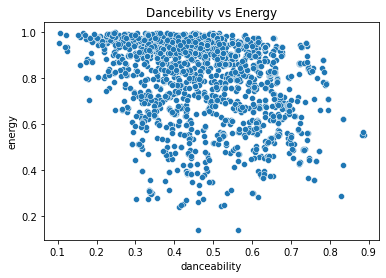

In [18]:
sns.scatterplot(x = df['danceability'], y = df['energy'])
plt.title('Dancebility vs Energy')
plt.show()

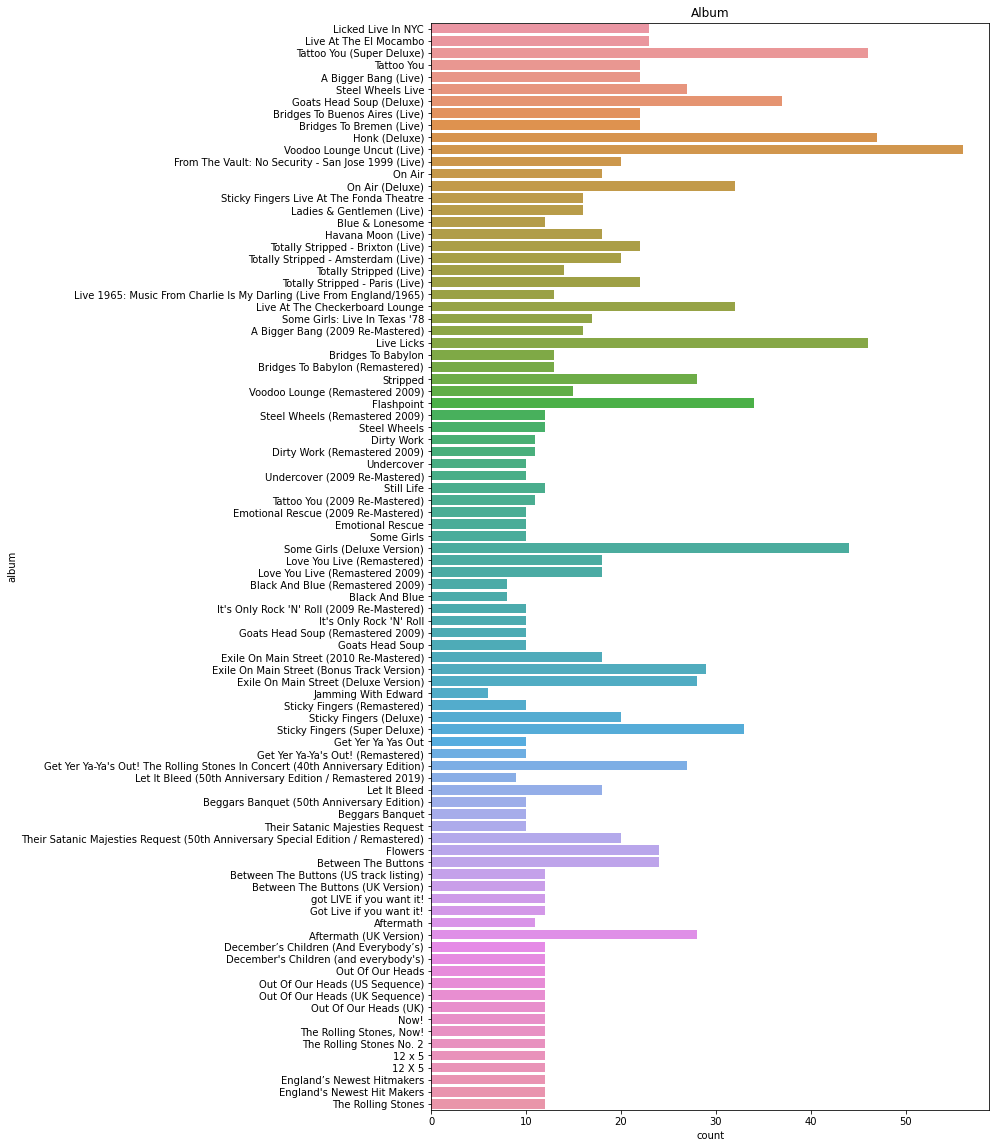

In [19]:
plt.figure(figsize=(10,20))
sns.countplot(y = df['album'])
plt.title('Album')
plt.show()

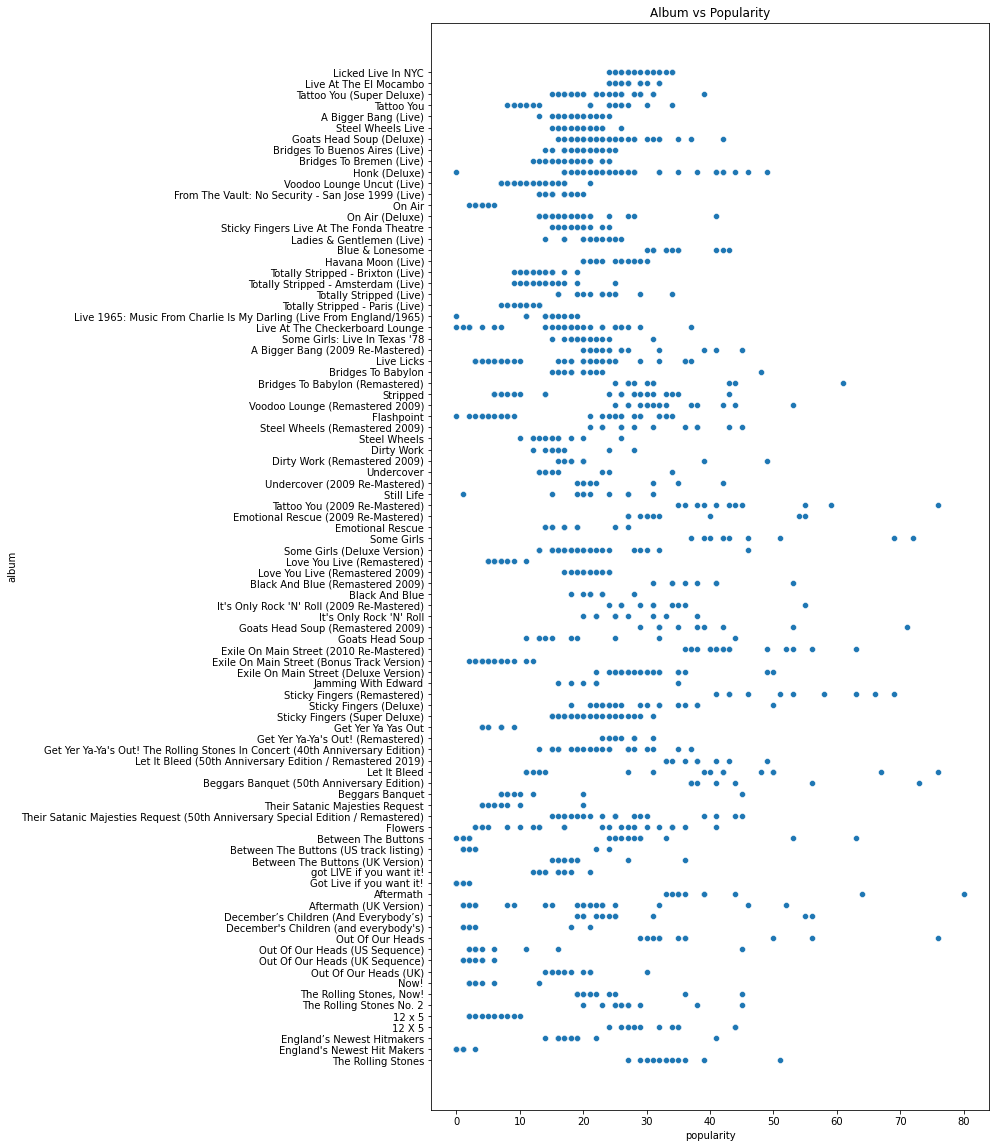

In [20]:
plt.figure(figsize=(10,20))
sns.scatterplot(x = dfc['popularity'], y = dfc['album'])
plt.title('Album vs Popularity')
plt.show()

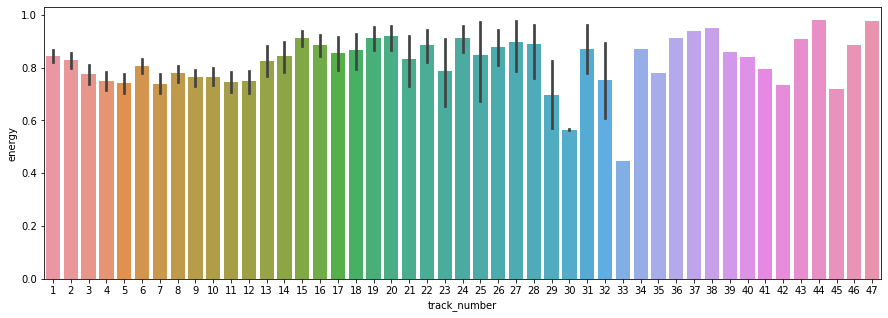

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x=dfc['track_number'], y = dfc['energy'])
plt.show()

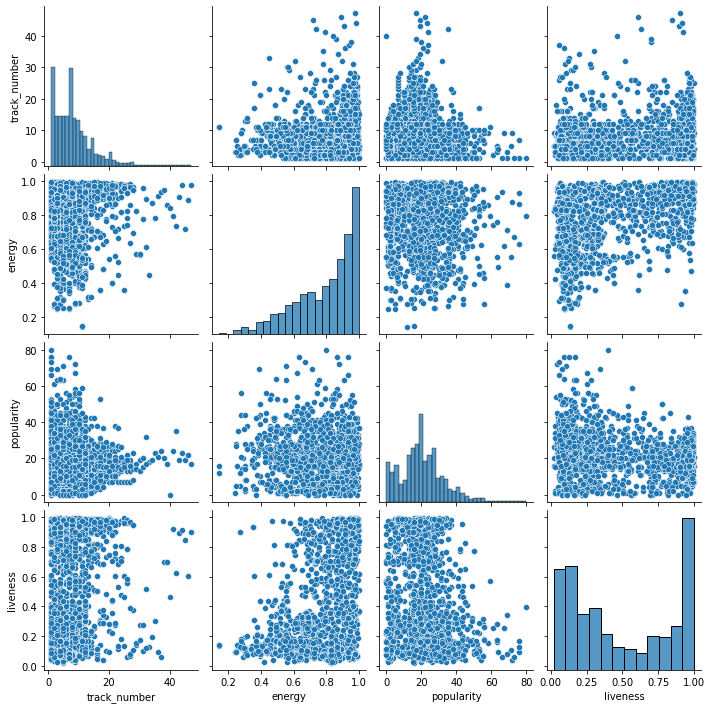

In [22]:
cols = ['track_number', 'energy', 'popularity', 'liveness']
sns.pairplot(dfc, vars=cols)
plt.show()

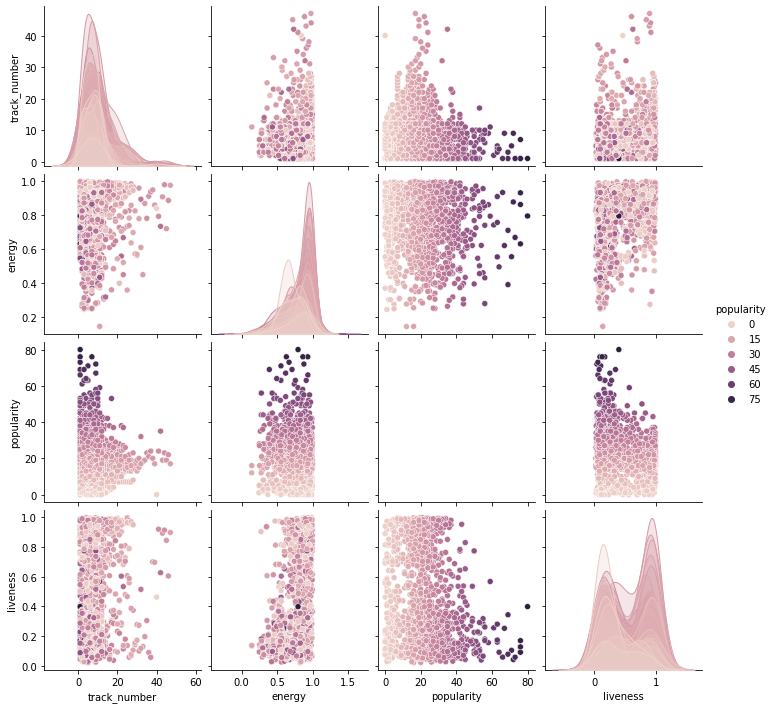

In [23]:
cols = ['track_number', 'energy', 'popularity', 'liveness']
sns.pairplot(dfc, vars=cols, hue='popularity')
plt.show()

# Cluster Analysis

In [24]:
df

,name,album,release_date,id,uri,danceability,energy,liveness,loudness,speechiness,valence
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.463,0.993,0.9320,-12.913,0.1100,0.0302
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.326,0.965,0.9610,-4.803,0.0759,0.3180
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.386,0.969,0.9560,-4.936,0.1150,0.3130
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.369,0.985,0.8950,-5.535,0.1930,0.1470
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.303,0.969,0.9660,-5.098,0.0930,0.2060
...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.466,0.932,0.3240,-9.214,0.0429,0.9670
1606,Tell Me,The Rolling Stones,1964-04-16,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.509,0.706,0.5160,-9.427,0.0843,0.4460
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.790,0.774,0.0669,-7.961,0.0720,0.8350
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.700,0.546,0.1660,-9.567,0.0622,0.5320


In [25]:
df.drop(['name'], axis=1, inplace=True)
df.drop(['album'], axis=1, inplace=True)
df.drop(['release_date'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)
df.drop(['uri'], axis=1, inplace=True)

In [26]:
df

,danceability,energy,liveness,loudness,speechiness,valence
0,0.463,0.993,0.9320,-12.913,0.1100,0.0302
1,0.326,0.965,0.9610,-4.803,0.0759,0.3180
2,0.386,0.969,0.9560,-4.936,0.1150,0.3130
3,0.369,0.985,0.8950,-5.535,0.1930,0.1470
4,0.303,0.969,0.9660,-5.098,0.0930,0.2060
...,...,...,...,...,...,...
1605,0.466,0.932,0.3240,-9.214,0.0429,0.9670
1606,0.509,0.706,0.5160,-9.427,0.0843,0.4460
1607,0.790,0.774,0.0669,-7.961,0.0720,0.8350
1608,0.700,0.546,0.1660,-9.567,0.0622,0.5320


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['loudness']])

In [28]:
df_scaled.shape

(1610, 1)

In [29]:
df['loud'] = df_scaled
df

,danceability,energy,liveness,loudness,speechiness,valence,loud
0,0.463,0.993,0.9320,-12.913,0.1100,0.0302,0.491365
1,0.326,0.965,0.9610,-4.803,0.0759,0.3180,0.838035
2,0.386,0.969,0.9560,-4.936,0.1150,0.3130,0.832350
3,0.369,0.985,0.8950,-5.535,0.1930,0.1470,0.806745
4,0.303,0.969,0.9660,-5.098,0.0930,0.2060,0.825425
...,...,...,...,...,...,...,...
1605,0.466,0.932,0.3240,-9.214,0.0429,0.9670,0.649483
1606,0.509,0.706,0.5160,-9.427,0.0843,0.4460,0.640378
1607,0.790,0.774,0.0669,-7.961,0.0720,0.8350,0.703044
1608,0.700,0.546,0.1660,-9.567,0.0622,0.5320,0.634393


In [30]:
df.drop(['loudness'], axis=1, inplace=True)
df

,danceability,energy,liveness,speechiness,valence,loud
0,0.463,0.993,0.9320,0.1100,0.0302,0.491365
1,0.326,0.965,0.9610,0.0759,0.3180,0.838035
2,0.386,0.969,0.9560,0.1150,0.3130,0.832350
3,0.369,0.985,0.8950,0.1930,0.1470,0.806745
4,0.303,0.969,0.9660,0.0930,0.2060,0.825425
...,...,...,...,...,...,...
1605,0.466,0.932,0.3240,0.0429,0.9670,0.649483
1606,0.509,0.706,0.5160,0.0843,0.4460,0.640378
1607,0.790,0.774,0.0669,0.0720,0.8350,0.703044
1608,0.700,0.546,0.1660,0.0622,0.5320,0.634393


In [31]:
from sklearn.cluster import KMeans

In [32]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [33]:
wcss

[397.18579073179524,
 193.18064606930488,
 150.23820091118216,
 129.0338305504876,
 111.5286109679081,
 100.81336784670273,
 93.99744844277252,
 87.63101900018361,
 82.6548483374903]

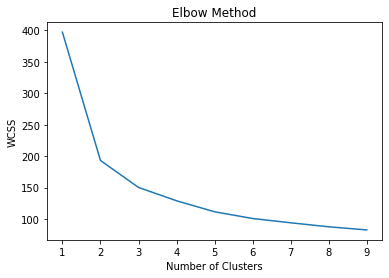

In [34]:
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [36]:
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [37]:
df['Clusters'] = labels
df

,danceability,energy,liveness,speechiness,valence,loud,Clusters
0,0.463,0.993,0.9320,0.1100,0.0302,0.491365,0
1,0.326,0.965,0.9610,0.0759,0.3180,0.838035,0
2,0.386,0.969,0.9560,0.1150,0.3130,0.832350,0
3,0.369,0.985,0.8950,0.1930,0.1470,0.806745,0
4,0.303,0.969,0.9660,0.0930,0.2060,0.825425,0
...,...,...,...,...,...,...,...
1605,0.466,0.932,0.3240,0.0429,0.9670,0.649483,1
1606,0.509,0.706,0.5160,0.0843,0.4460,0.640378,1
1607,0.790,0.774,0.0669,0.0720,0.8350,0.703044,1
1608,0.700,0.546,0.1660,0.0622,0.5320,0.634393,1


In [38]:
from sklearn.metrics import silhouette_score
silhouette_s = round(silhouette_score(df, labels),2)
silhouette_s

0.66

In [ ]:
# Dimensionality reduction techniques are used when ther are too many columns, in initial steps corelation matrix is used.  